<a href="https://colab.research.google.com/github/Sharugh/sharugh-ML-projects/blob/main/Analyzing_and_Forecasting_the_Stock_Prices_of_World's_Major_Oil_Products_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : World Major oils Stock price analysis and forecasting**






## **Problem Statement :-**

Time Series Analysis of World major Oils .

**Problem Type**: Forecasting

**Actionable Decision**: Whether to Invest or Not in the Stock

# **Importing necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# **Loading the Dataset**

In [ ]:
df=pd.read_csv('/content/oil and gas.csv')
df

Symbol        Date     Open     High      Low    Close  Volume  \
0        Brent Oil  2000-01-04  23.9000  24.7000  23.8900  24.3900   32509   
1        Brent Oil  2000-01-05  24.2500  24.3700  23.7000  23.7300   30310   
2        Brent Oil  2000-01-06  23.5500  24.2200  23.3500  23.6200   44662   
3        Brent Oil  2000-01-07  23.5700  23.9800  23.0500  23.0900   34826   
4        Brent Oil  2000-01-10  23.0400  23.7800  23.0400  23.7300   26388   
...            ...         ...      ...      ...      ...      ...     ...   
23019  Heating Oil  2022-06-13   4.3612   4.3762   4.1949   4.2834   46406   
23020  Heating Oil  2022-06-14   4.2749   4.4570   4.2488   4.3940   36652   
23021  Heating Oil  2022-06-15   4.3816   4.6070   4.3557   4.5470   36908   
23022  Heating Oil  2022-06-16   4.5320   4.5825   4.4124   4.5713   28269   
23023  Heating Oil  2022-06-17   4.5719   4.6444   4.2936   4.3398       0   

      Currency  
0          USD  
1          USD  
2          USD  
3          USD  
4          USD  
...        ...  
23019      USD  
23020      USD  
23021      USD  
23022      USD  
23023      USD  

[23024 rows x 8 columns]

# **Data Describtion :-**

Symbol : Major Oils (Products)

Date : Date of trading

Open : Price at which security first trades

High : Highest Price of the trading day

Low : Lowest Price of the trading day

Close : Last Price the stock traded during the trading day

Volume : Number of Shares that changed hands during the trading day

# **Exploratory data analysis(EDA):**

In [ ]:
df.head()

Symbol        Date   Open   High    Low  Close  Volume Currency
0  Brent Oil  2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  Brent Oil  2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  Brent Oil  2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  Brent Oil  2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  Brent Oil  2000-01-10  23.04  23.78  23.04  23.73   26388      USD

In [ ]:
df.tail()

Symbol        Date    Open    High     Low   Close  Volume  \
23019  Heating Oil  2022-06-13  4.3612  4.3762  4.1949  4.2834   46406   
23020  Heating Oil  2022-06-14  4.2749  4.4570  4.2488  4.3940   36652   
23021  Heating Oil  2022-06-15  4.3816  4.6070  4.3557  4.5470   36908   
23022  Heating Oil  2022-06-16  4.5320  4.5825  4.4124  4.5713   28269   
23023  Heating Oil  2022-06-17  4.5719  4.6444  4.2936  4.3398       0   

      Currency  
23019      USD  
23020      USD  
23021      USD  
23022      USD  
23023      USD

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbol    23024 non-null  object 
 1   Date      23024 non-null  object 
 2   Open      23024 non-null  float64
 3   High      23024 non-null  float64
 4   Low       23024 non-null  float64
 5   Close     23024 non-null  float64
 6   Volume    23024 non-null  int64  
 7   Currency  23024 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


##Checking Null Values

In [ ]:
df.isna().sum()

Symbol      0
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

##Checking for duplicates

In [ ]:
df.duplicated().sum()

0

##Shape of the Dataset

In [ ]:
df.shape

(23024, 8)

##Converting Volume(int) column to Float

In [ ]:
df['Volume']=df['Volume'].astype(float)

##Naming Date column as Year

In [ ]:
df.Date = pd.to_datetime(df.Date)
df["Year"] = df.Date.dt.year

##Extracting the unique list of products from Symbol

In [ ]:
products = list(df.Symbol.unique())
products

['Brent Oil', 'Crude Oil WTI', 'Natural Gas', 'Heating Oil']

##Grouping the Symbol

In [ ]:
product_grouping = df.groupby("Symbol")

##Visualization

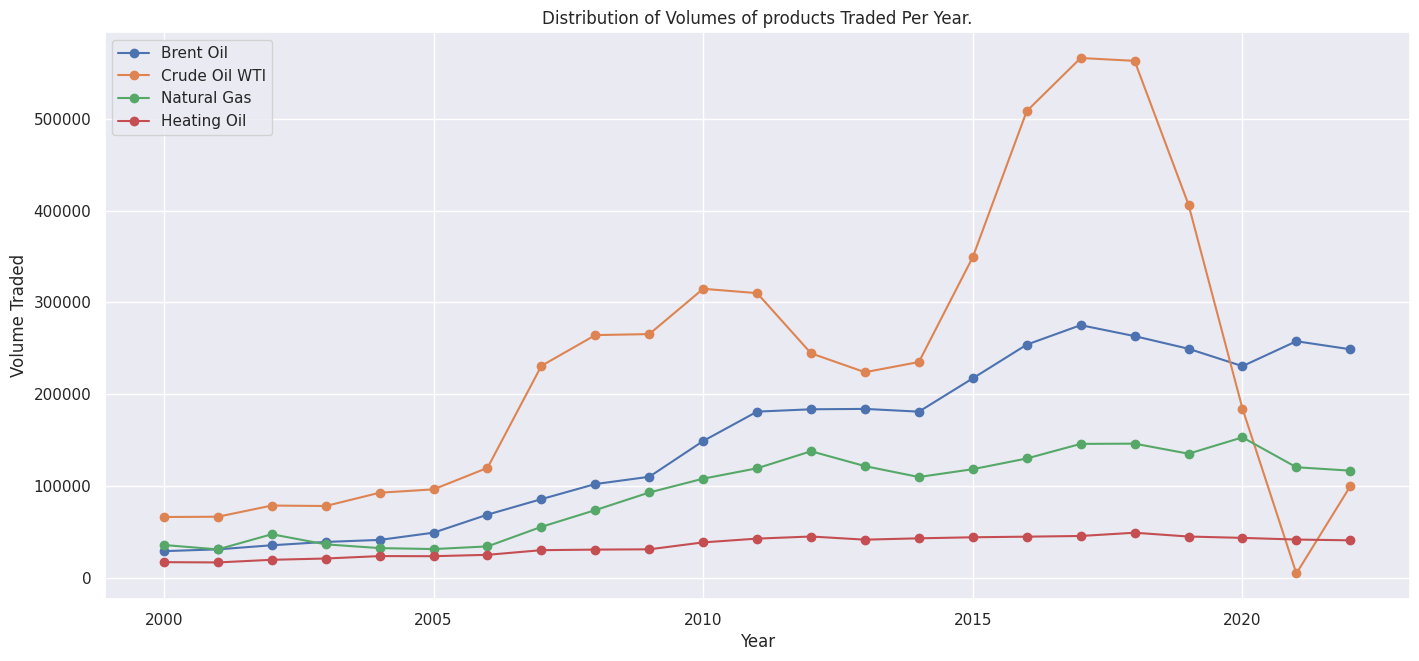

In [ ]:
plt.figure(figsize=(15,7))
for prod in products:
    average_vol_per_product = product_grouping.get_group(prod).groupby("Year")["Volume"].mean().to_frame()
    plt.plot(average_vol_per_product.index, average_vol_per_product.Volume, marker ="o")
plt.xlabel("Year")
plt.ylabel("Volume Traded")
plt.title("Distribution of Volumes of products Traded Per Year.")
plt.legend(["Brent Oil",'Crude Oil WTI', 'Natural Gas', 'Heating Oil'], loc = "upper left");

##Extracting out the Top 10 Volume

In [ ]:
top10_high = df.nlargest(10, 'Volume')
top10_high

Symbol       Date   Open   High    Low  Close     Volume  \
10786  Crude Oil WTI 2019-09-16  61.48  63.38  58.77  51.98  1404916.0   
10049  Crude Oil WTI 2016-11-30  45.24  49.90  45.22  56.43  1311000.0   
10427  Crude Oil WTI 2018-05-08  70.03  70.40  67.63  52.38  1253566.0   
10944  Crude Oil WTI 2020-04-22  13.12  16.18  10.26  36.13  1235218.0   
10868  Crude Oil WTI 2020-01-08  62.84  65.65  59.15  51.63  1205710.0   
10186  Crude Oil WTI 2017-06-07  47.98  48.23  45.65  50.32  1182327.0   
10206  Crude Oil WTI 2017-07-05  47.04  47.32  44.51  52.73  1173581.0   
10176  Crude Oil WTI 2017-05-25  51.25  52.00  48.45  51.50  1147389.0   
10461  Crude Oil WTI 2018-06-22  65.93  69.38  65.71  55.91  1136232.0   
10232  Crude Oil WTI 2017-08-10  49.68  50.22  48.35  51.13  1135440.0   

      Currency  Year  
10786      USD  2019  
10049      USD  2016  
10427      USD  2018  
10944      USD  2020  
10868      USD  2020  
10186      USD  2017  
10206      USD  2017  
10176      USD  2017  
10461      USD  2018  
10232      USD  2017

##Combaining all products and its volume and applying mean to find out the average of volume per year traded for each product

In [ ]:
brent = product_grouping.get_group("Brent Oil").groupby("Year")["Volume"].mean().to_frame(name = "Average Volume")
brent["Product"] = "Brent Oil"
brent["Year"] = brent.index

crude = product_grouping.get_group("Crude Oil WTI").groupby("Year")["Volume"].mean().to_frame(name = "Average Volume")
crude["Product"]= "Crude Oil"
crude["Year"] = crude.index

natural_gas = product_grouping.get_group("Natural Gas").groupby("Year")["Volume"].mean().to_frame(name = "Average Volume")
natural_gas["Product"]= "Natural Gas"
natural_gas["Year"] = natural_gas.index

heating_oil = product_grouping.get_group("Heating Oil").groupby("Year")["Volume"].mean().to_frame(name = "Average Volume")
heating_oil["Product"]= "Heating Oil"
heating_oil["Year"] = heating_oil.index

combined = pd.concat([brent, crude, natural_gas, heating_oil])

##Visualization

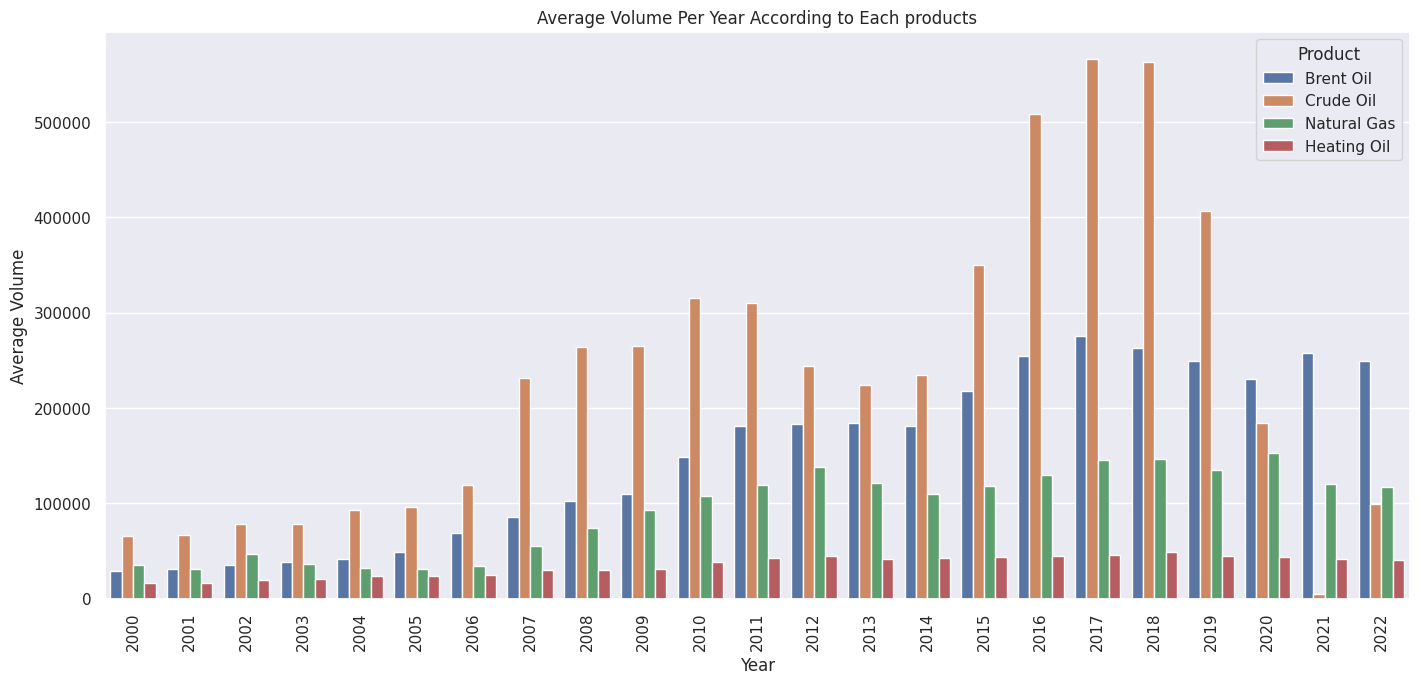

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = combined.index, y = "Average Volume", hue = "Product", data = combined)
plt.xticks(rotation=90)
plt.ylabel("Average Volume")
plt.title("Average Volume Per Year According to Each products");

##Visualizing the Time series of Closing price of each products using Matplotlib

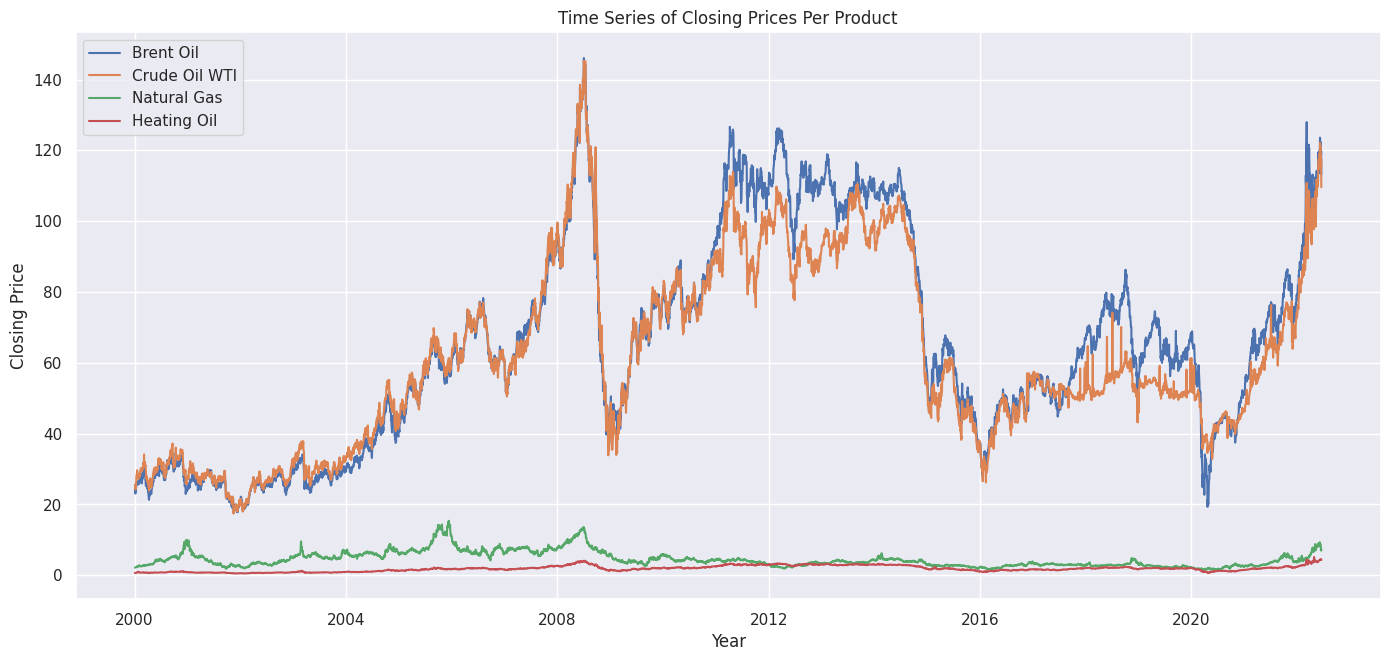

In [ ]:
plt.figure(figsize = (15,7))
for prod in products:
    data = product_grouping.get_group(prod)
    plt.plot(data["Date"], data["Close"])
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Time Series of Closing Prices Per Product")
plt.legend(["Brent Oil",'Crude Oil WTI', 'Natural Gas', 'Heating Oil'], loc = "upper left");

##Correlation

In [ ]:
corr=df.corr()
corr

<ipython-input-213-7d5195e2bf4d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Open      High       Low     Close    Volume      Year
Open    1.000000  0.999820  0.999794  0.998575  0.445098  0.128391
High    0.999820  1.000000  0.999700  0.998822  0.446790  0.128421
Low     0.999794  0.999700  1.000000  0.998718  0.442691  0.128358
Close   0.998575  0.998822  0.998718  1.000000  0.437821  0.125334
Volume  0.445098  0.446790  0.442691  0.437821  1.000000  0.369563
Year    0.128391  0.128421  0.128358  0.125334  0.369563  1.000000

##Visualizing the correlation accross the dataset using heatmap

<Axes: >

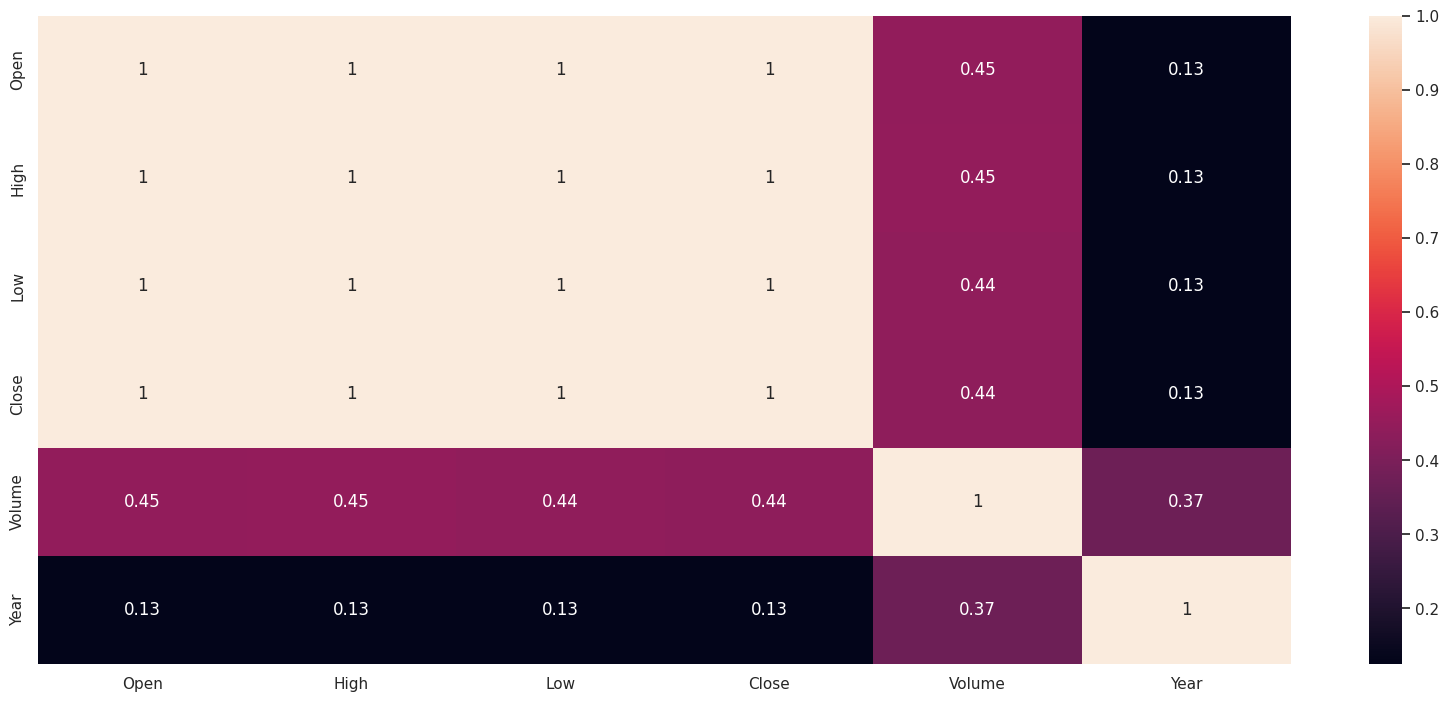

In [ ]:
sns.heatmap(corr,annot=True)

##Ploting the volume traded against closing price of all products

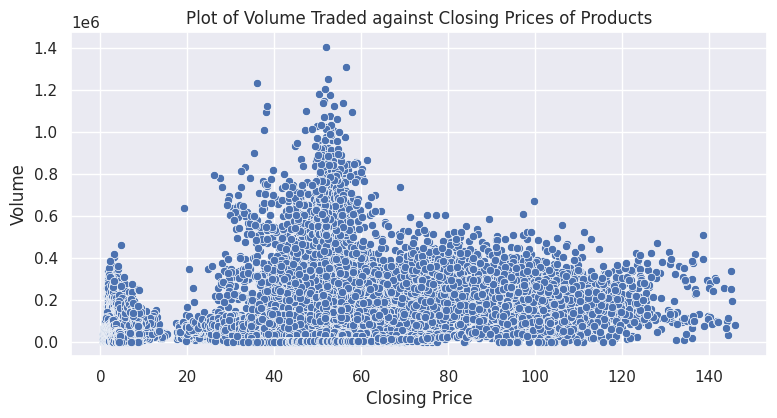

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = df["Close"], y = df["Volume"])
plt.title("Plot of Volume Traded against Closing Prices of Products")
plt.xlabel("Closing Price");

##Ploting the volume traded against closing price of each products

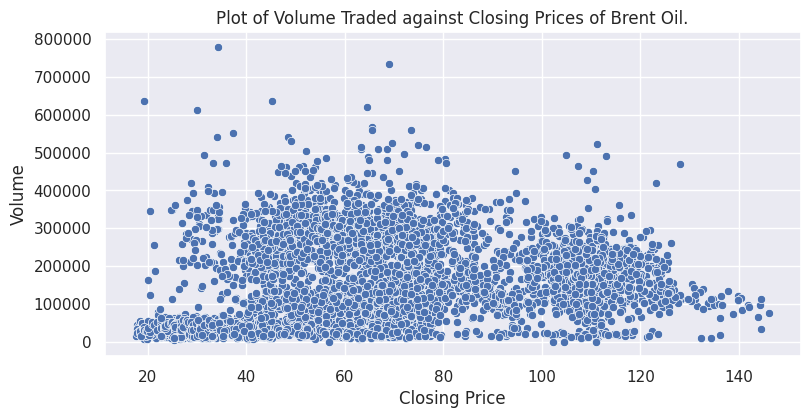

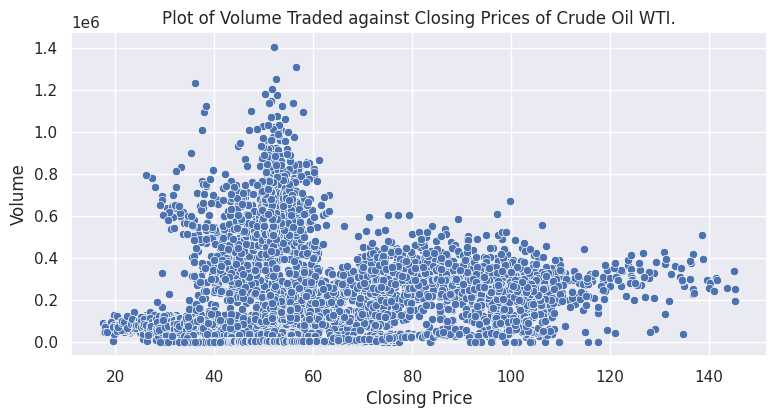

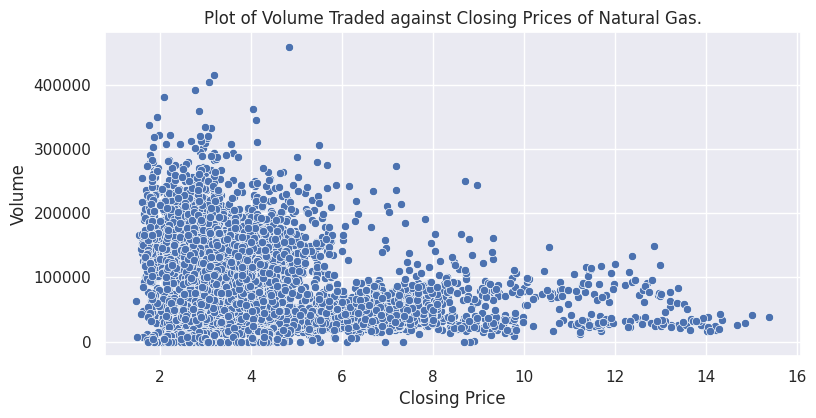

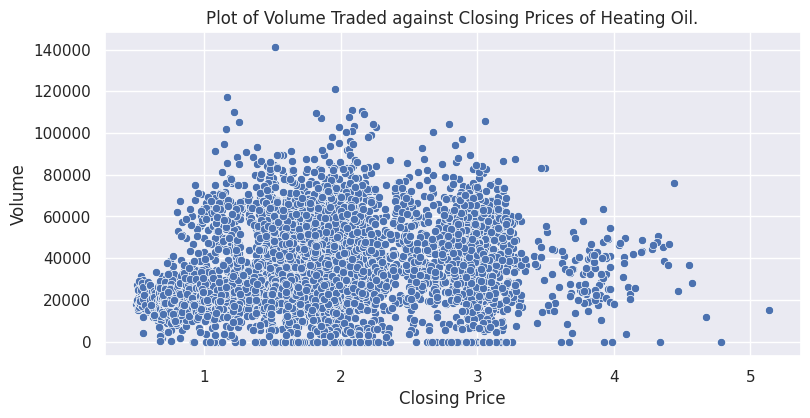

In [ ]:
products = list(df["Symbol"].unique())
for prod in products:
    plt.figure(figsize=(8,4))
    data = product_grouping.get_group(prod)
    sns.scatterplot(x = data["Close"], y = data["Volume"])
    plt.title("Plot of Volume Traded against Closing Prices of " + prod + ".")
    plt.xlabel("Closing Price");

##Visualizing the Total trading "Open" , "High" , "Volume"  distribution of Major world Oils using Plotly

In [ ]:
for y in ["Open", "High", "Volume"]:
    fig = px.histogram(df, x = "Date", y = y, color = "Symbol",
                       color_discrete_sequence = px.colors.qualitative.Set2,
                       title = f"Total Trading {y} Distribution of Major world oils")
    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 18))
    fig.show()

##Visualizing the volume trend across each year

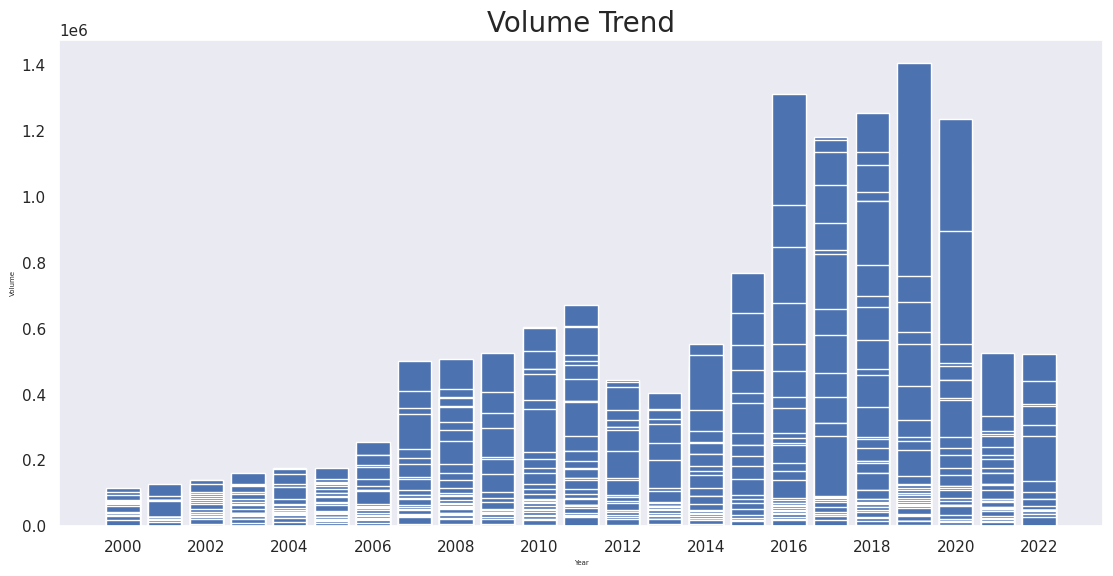

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(df["Year"], df["Volume"])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("Year", fontsize = 5)
ax.set_ylabel("Volume", fontsize = 5)
plt.title('Volume Trend', fontsize = 20)
plt.grid()
plt.show()

### **Calculating the moving average which smooths out  price data by creating constantly updated average price of the stocks**

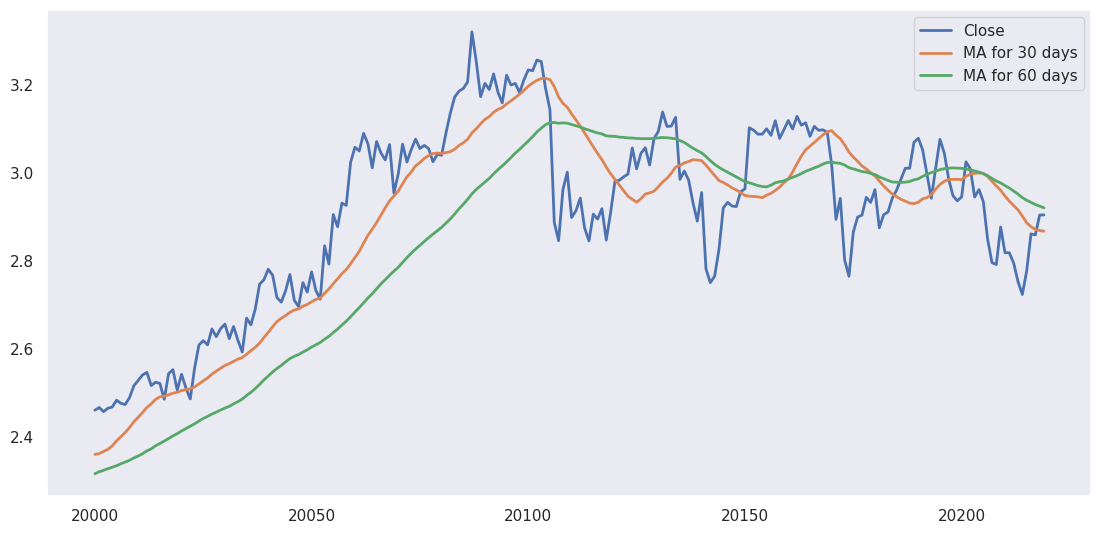

In [ ]:
df["MA for 30 days"] = df["Close"].rolling(20).mean()
df["MA for 60 days"] = df["Close"].rolling(50).mean()
df.truncate(before = "2000-01-04", after = "2022-06-17")[["Close", "MA for 30 days", "MA for 60 days"]].plot(subplots = False, figsize = (12, 6), linewidth = 2)
plt.grid()

##Visualizing the distribution of Close prices of world oils

<ipython-input-220-d0bc91f9b7d3>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Maximum open price of stock ever obtained: 146.08
Minimum open price of stock ever obtained: 0.4999


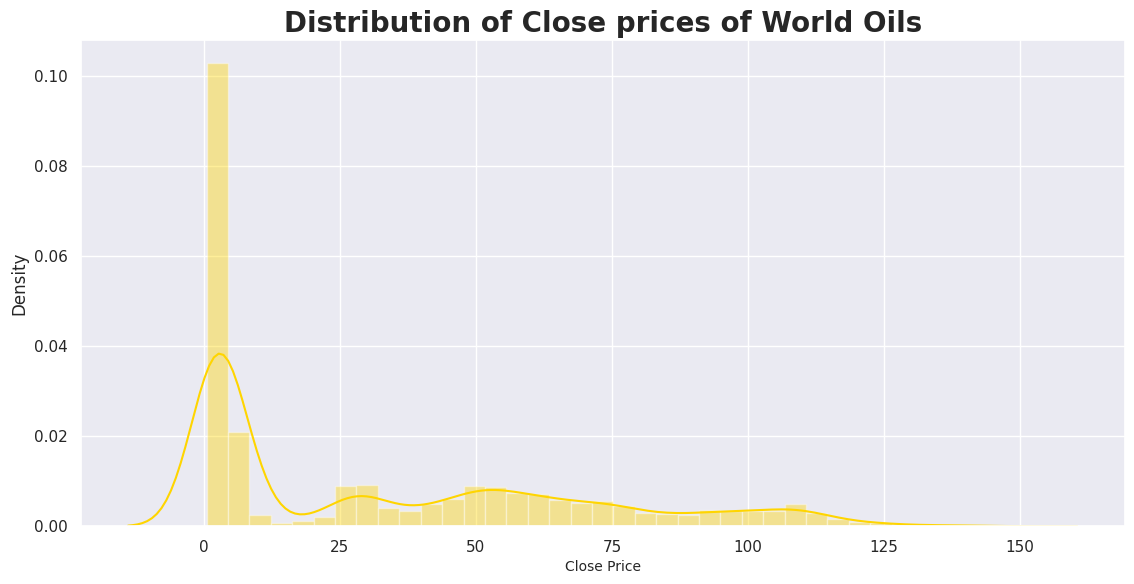

In [ ]:
plt.figure(figsize = (12, 6))
sns.distplot(df["Close"], color= "#FFD500")
plt.title("Distribution of Close prices of World Oils", fontweight = "bold", fontsize = 20)
plt.xlabel("Close Price", fontsize = 10)
print("Maximum open price of stock ever obtained:", df["Close"].max())
print("Minimum open price of stock ever obtained:", df["Close"].min())

##Again Loading the Dataset for forecasting and Predictions

In [ ]:
df1=pd.read_csv('/content/oil and gas.csv',sep=',')
df1

Symbol        Date     Open     High      Low    Close  Volume  \
0        Brent Oil  2000-01-04  23.9000  24.7000  23.8900  24.3900   32509   
1        Brent Oil  2000-01-05  24.2500  24.3700  23.7000  23.7300   30310   
2        Brent Oil  2000-01-06  23.5500  24.2200  23.3500  23.6200   44662   
3        Brent Oil  2000-01-07  23.5700  23.9800  23.0500  23.0900   34826   
4        Brent Oil  2000-01-10  23.0400  23.7800  23.0400  23.7300   26388   
...            ...         ...      ...      ...      ...      ...     ...   
23019  Heating Oil  2022-06-13   4.3612   4.3762   4.1949   4.2834   46406   
23020  Heating Oil  2022-06-14   4.2749   4.4570   4.2488   4.3940   36652   
23021  Heating Oil  2022-06-15   4.3816   4.6070   4.3557   4.5470   36908   
23022  Heating Oil  2022-06-16   4.5320   4.5825   4.4124   4.5713   28269   
23023  Heating Oil  2022-06-17   4.5719   4.6444   4.2936   4.3398       0   

      Currency  
0          USD  
1          USD  
2          USD  
3          USD  
4          USD  
...        ...  
23019      USD  
23020      USD  
23021      USD  
23022      USD  
23023      USD  

[23024 rows x 8 columns]

##Finding out the middle values of the date column

In [ ]:
start_index = 500
end_index = 3941
middle_values = df1['Date'].iloc[start_index - 1:end_index]
middle_values

499     2001-12-20
500     2001-12-21
501     2001-12-24
502     2001-12-27
503     2001-12-28
           ...    
3936    2015-05-19
3937    2015-05-20
3938    2015-05-21
3939    2015-05-22
3940    2015-05-25
Name: Date, Length: 3442, dtype: object

##Converting date to date time object

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d')

In [ ]:
df1.dtypes

Symbol              object
Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
dtype: object

##Making Date as Index

In [ ]:
df1.set_index('Date',inplace=True)

In [ ]:
df1['Date'] = df1.index

In [ ]:
df1.head()

Symbol   Open   High    Low  Close  Volume Currency       Date
Date                                                                         
2000-01-04  Brent Oil  23.90  24.70  23.89  24.39   32509      USD 2000-01-04
2000-01-05  Brent Oil  24.25  24.37  23.70  23.73   30310      USD 2000-01-05
2000-01-06  Brent Oil  23.55  24.22  23.35  23.62   44662      USD 2000-01-06
2000-01-07  Brent Oil  23.57  23.98  23.05  23.09   34826      USD 2000-01-07
2000-01-10  Brent Oil  23.04  23.78  23.04  23.73   26388      USD 2000-01-10

##Droping the Symbol column

In [ ]:
df1.drop('Symbol', axis=1, inplace=True)

In [ ]:
df1.head()

Open   High    Low  Close  Volume Currency       Date
Date                                                              
2000-01-04  23.90  24.70  23.89  24.39   32509      USD 2000-01-04
2000-01-05  24.25  24.37  23.70  23.73   30310      USD 2000-01-05
2000-01-06  23.55  24.22  23.35  23.62   44662      USD 2000-01-06
2000-01-07  23.57  23.98  23.05  23.09   34826      USD 2000-01-07
2000-01-10  23.04  23.78  23.04  23.73   26388      USD 2000-01-10

##Finding the middle value of the Date column

In [ ]:
middle_value = df1['Date'].median()
print("Median:", middle_value)

Median: 2011-06-03 00:00:00


##Feature selection:
#We consider Close as our target variables as it accounts for all corporate decisions like stock split and dividents.
#Droping "Open", "High", "Low", "Volume" columns

In [ ]:
data_feature_selected = df1.drop(axis=1,labels=['Open','High','Low','Volume'])

# **Resampling**

##Resample Data to Monthly instead of Daily by Aggregating Using Mean

In [ ]:
monthly_mean = data_feature_selected['Close'].resample('M').mean()

In [ ]:
monthly_data = monthly_mean.to_frame()
monthly_data

Close
Date                 
2000-01-31  13.999397
2000-02-29  15.076235
2000-03-31  15.185277
2000-04-30  12.965827
2000-05-31  15.014570
...               ...
2022-02-28  46.362795
2022-03-31  55.344295
2022-04-30  54.140568
2022-05-31  57.345114
2022-06-30  62.596537

[270 rows x 1 columns]

# **Exploratory data analysis for monthly data:**

In [ ]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

Close  Year     Month  dayofweek  quarter
Date                                                     
2000-01-31  13.999397  2000   January     Monday        1
2000-02-29  15.076235  2000  February    Tuesday        1
2000-03-31  15.185277  2000     March     Friday        1
2000-04-30  12.965827  2000     April     Sunday        2
2000-05-31  15.014570  2000       May  Wednesday        2
...               ...   ...       ...        ...      ...
2022-02-28  46.362795  2022  February     Monday        1
2022-03-31  55.344295  2022     March   Thursday        1
2022-04-30  54.140568  2022     April   Saturday        2
2022-05-31  57.345114  2022       May    Tuesday        2
2022-06-30  62.596537  2022      June   Thursday        2

[270 rows x 5 columns]

<ipython-input-132-a3d551a87af8>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.015, '0.015'),
  Text(0, 0.02, '0.020'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.03, '0.030'),
  Text(0, 0.035, '0.035')])

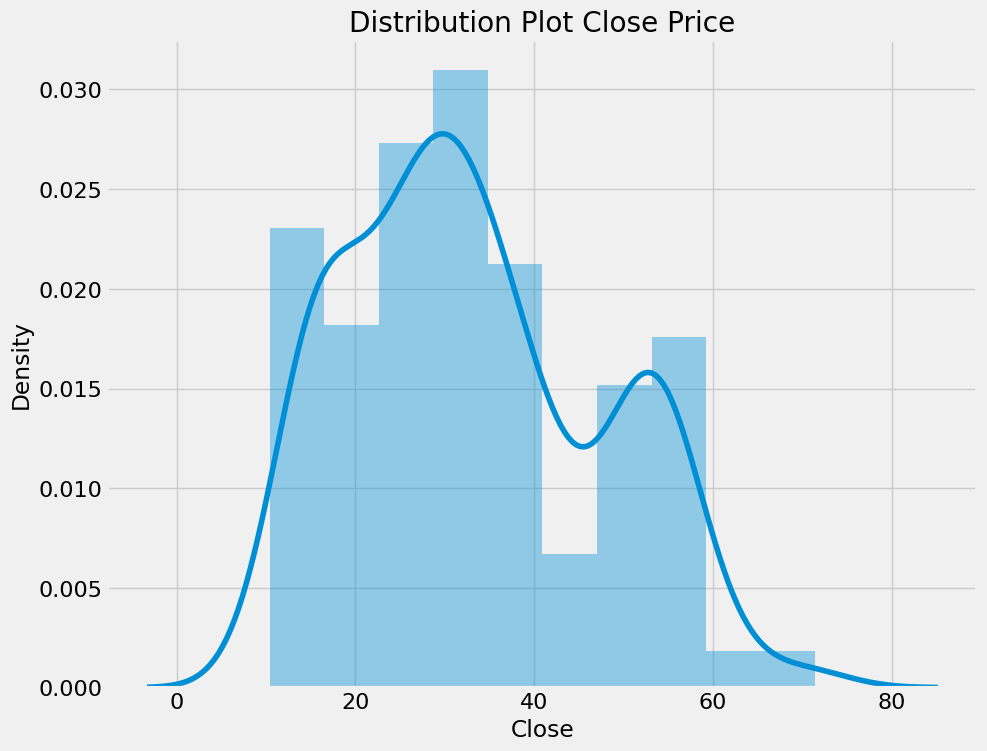

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Close']).set_title("Distribution Plot Close Price")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### **Distribution Plot Inference : Distribution shows Right Skew**

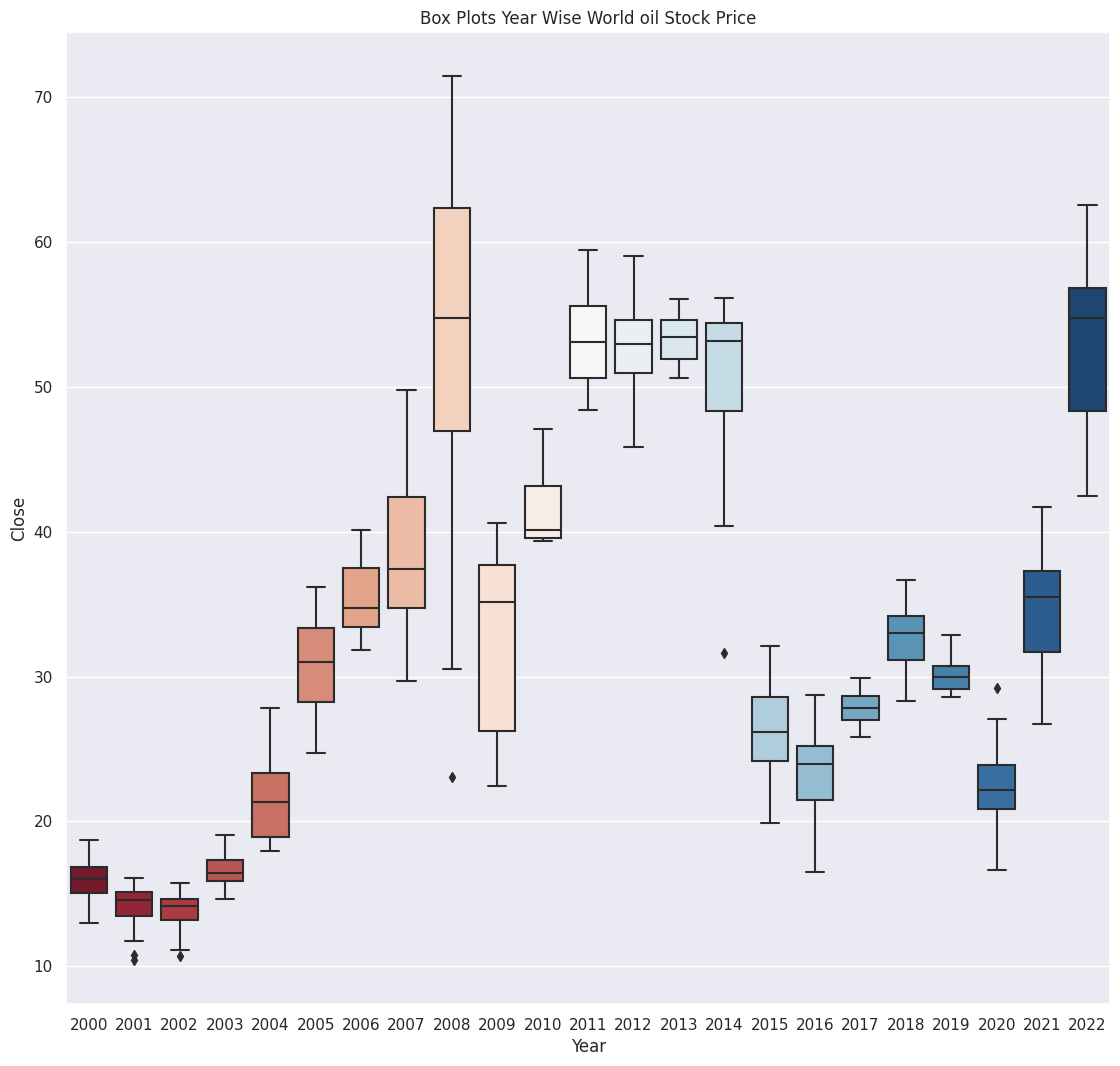

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise World oil Stock Price')
plt.style.context('fivethirtyeight')

### **Inferences Box Plot**

->Outliers Present in Year 2001, 2002,2008, 2014 and 2020

->Upward Rising Trend is shown

##Visualizing the monthly Stock price

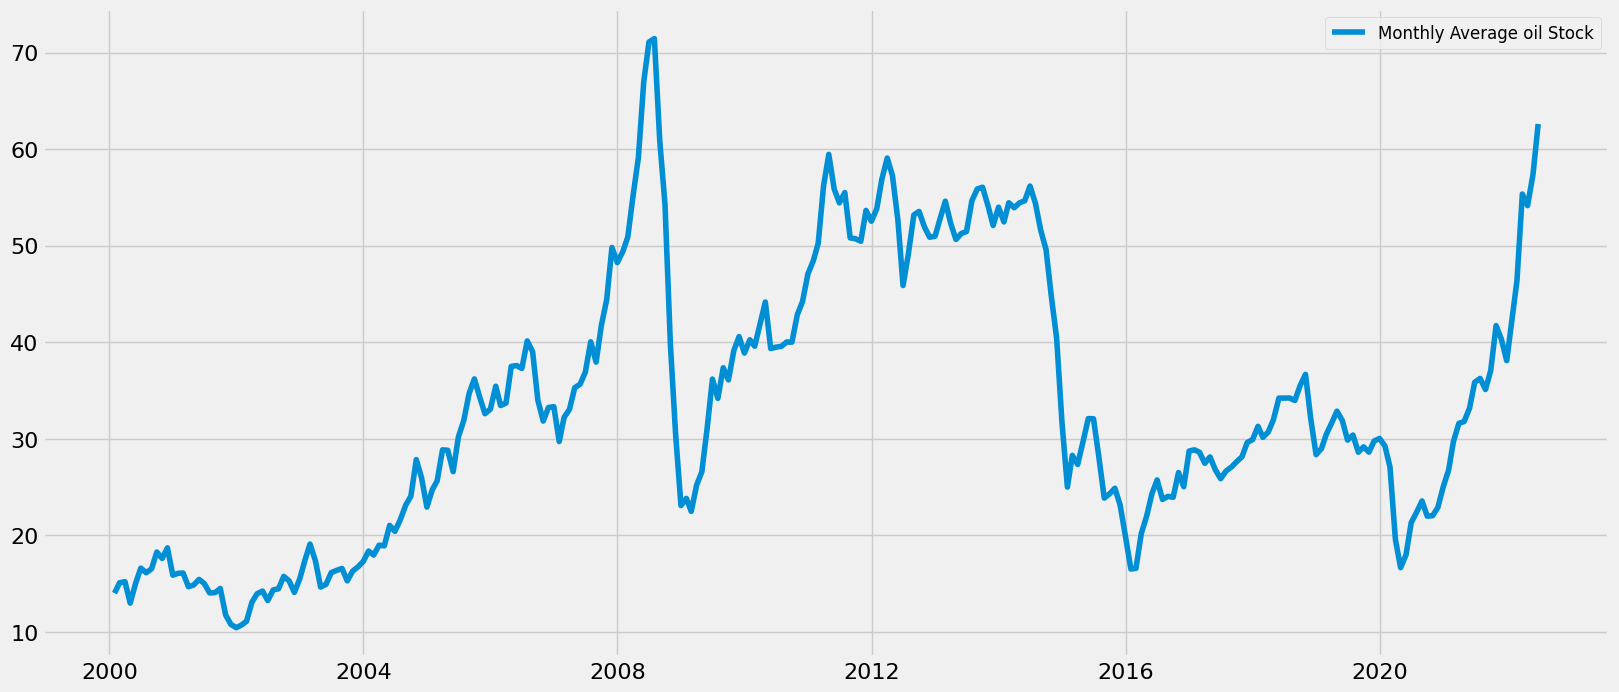

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Close'],label='Monthly Average oil Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

##Decomposition of Time Series

<Figure size 2000x1600 with 0 Axes>

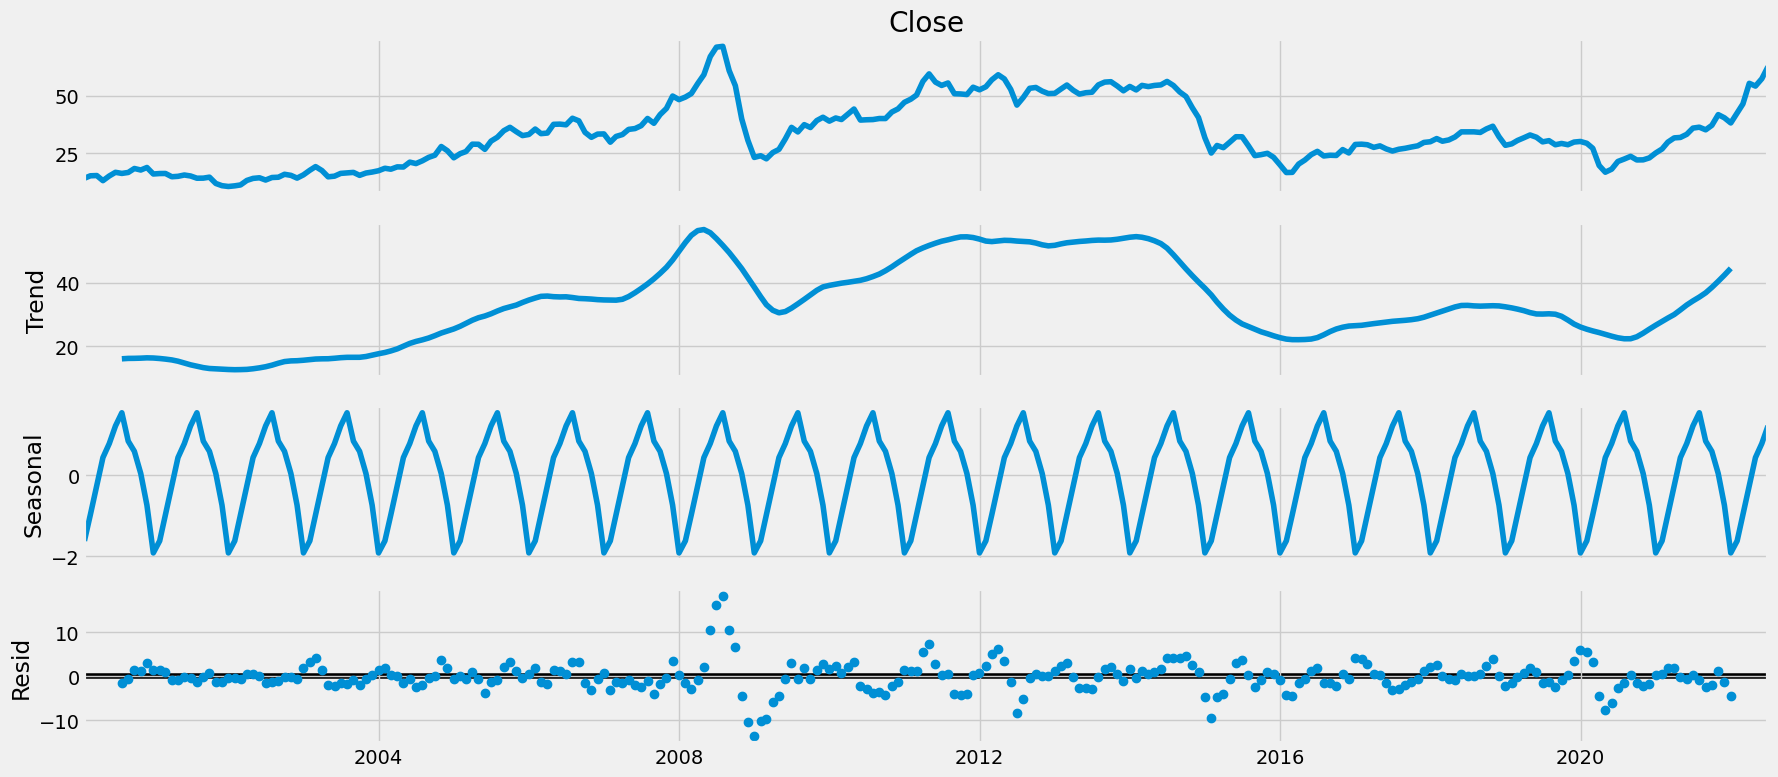

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Close'],model='additive')
decomposed_series.plot()
plt.show()

# **Stationarity Test of Time Series**

# Using Augmented Dickey-Fuller(ADF) Test

## **Null Hypothesis**: Time series has a unit root -It is non-stationary

## **Alternate Hypothesis** : Time series does not have a unit root -It is stationary

## Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [ ]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [ ]:
ad_fuller_func(monthly_data['Close'])

ADF Statistic: -2.084890
p-value: 0.250634
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
Failed to Reject Ho-Time Series is Non-Stationary


## **Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)**

### Statistically verified by ADF Test

Text(0.5, 0, 'Lags')

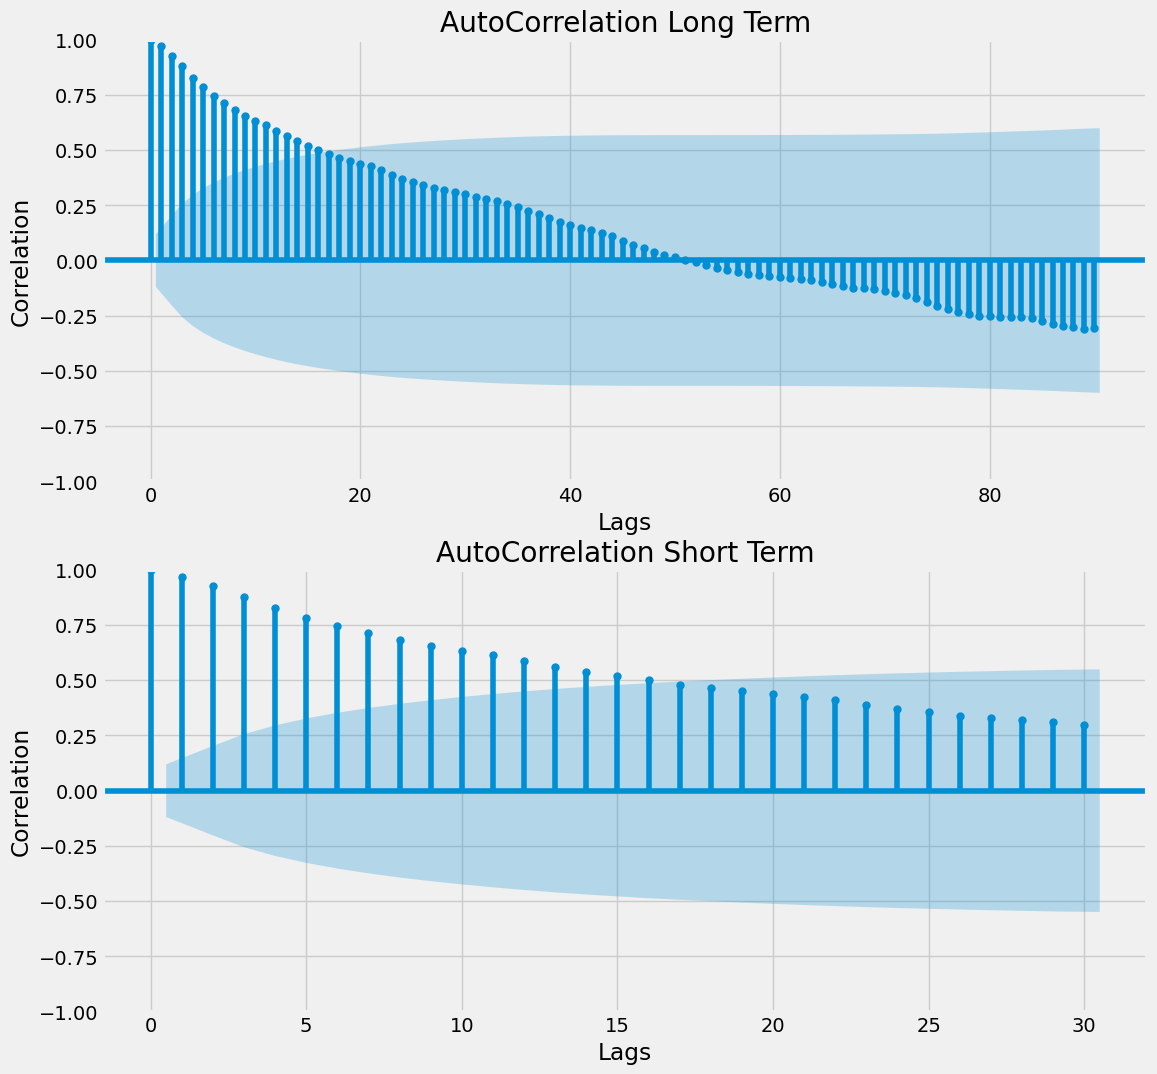

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

# **Interpreting ACF Plot :-**

### ->Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

### ->Also tells us series is Non-stationary

# **Transformations To Make Series Stationary**
##Differencing By 1

In [ ]:
monthly_diff = monthly_data['Close'] - monthly_data['Close'].shift(1)

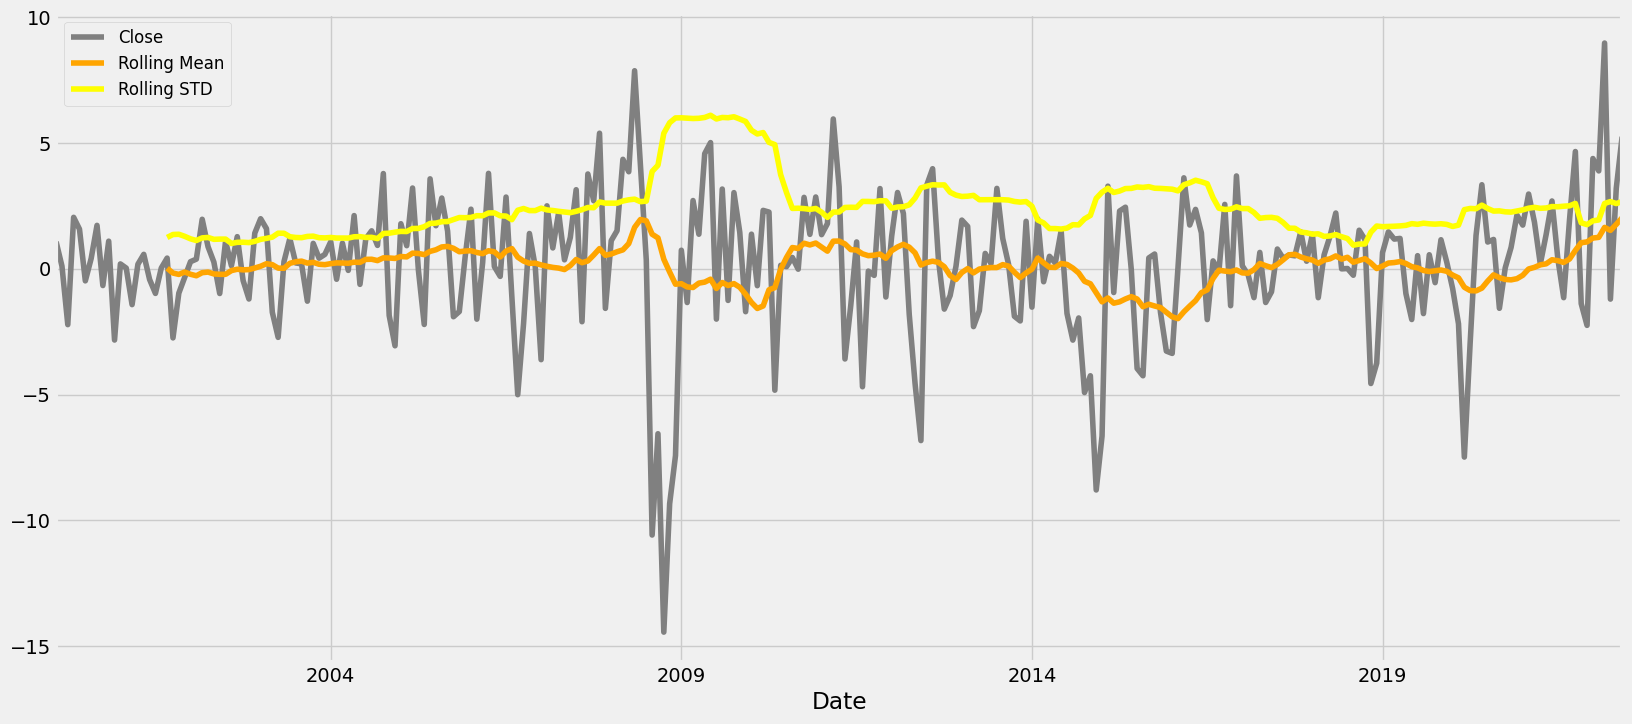

In [ ]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

# **The series looks stationary as its having constant mean and variance .**

##Checking if Time Series is Stationary by Running ADF Test

In [ ]:
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -10.683516
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
Reject Null Hypothesis(Ho)-Time Series is Stationary


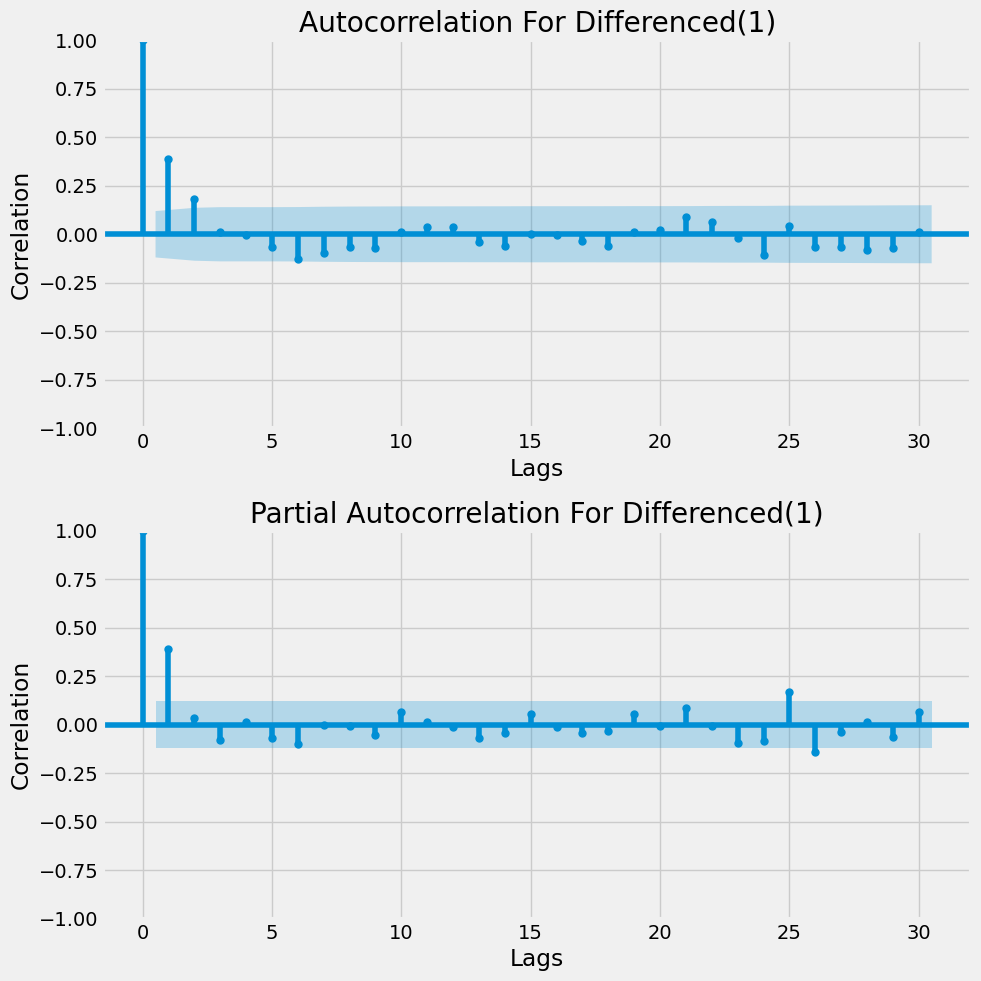

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

## According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

# **Modelling ARIMA**

In [ ]:
model=ARIMA(monthly_data['Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

##Forecasting and Predicting the close price of the major oils using ARIMA model

Predictions:
Date
2000-03-31    15.501592
2000-04-30    15.256901
2000-05-31    12.118478
2000-06-30    15.742079
2000-07-31    17.250608
                ...    
2022-01-31    37.187883
2022-02-28    44.090531
2022-03-31    47.972215
2022-04-30    58.906176
2022-05-31    53.927527
Freq: M, Name: predicted_mean, Length: 267, dtype: float64


Text(0, 0.5, 'Price')

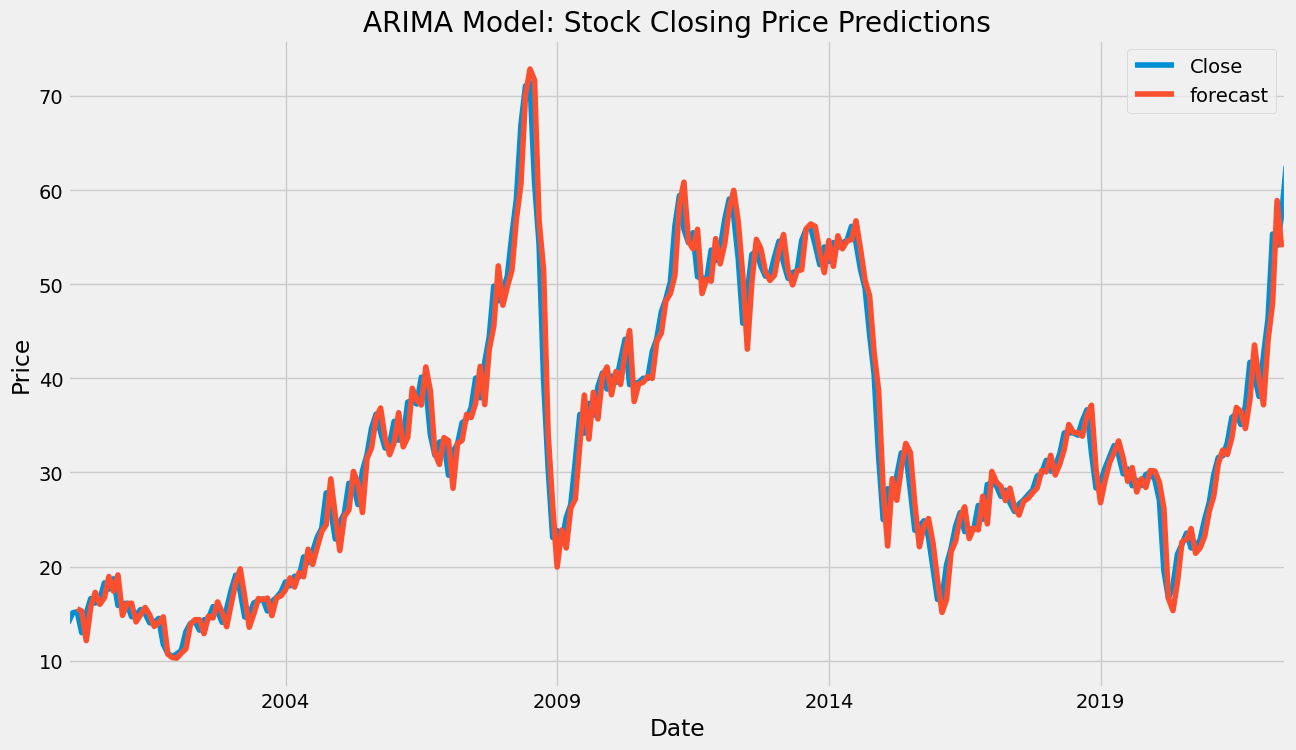

In [ ]:
results=model.fit()
start_date = '2000-03-31'
end_date = '2022-05-31'
predictions = results.predict(start=start_date, end=end_date, dynamic=False)
print("Predictions:")
print(predictions)
monthly_data['forecast']=results.predict(start=start_date,end=end_date,dynamic=False)
monthly_data[['Close','forecast']].plot(figsize=(14,8))
plt.title('ARIMA Model: Stock Closing Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')

# **Modelling SARIMA**

In [ ]:
model=sm.tsa.statespace.SARIMAX(monthly_data['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

# Forecasting and Predicting the close price of the major oils using SARIMA model

Predictions:
Date
2000-03-31    15.076258
2000-04-30    15.185288
2000-05-31    12.965820
2000-06-30    15.014578
2000-07-31    16.593387
                ...    
2022-01-31    37.791247
2022-02-28    44.833598
2022-03-31    48.430654
2022-04-30    59.079772
2022-05-31    54.318153
Freq: M, Name: predicted_mean, Length: 267, dtype: float64


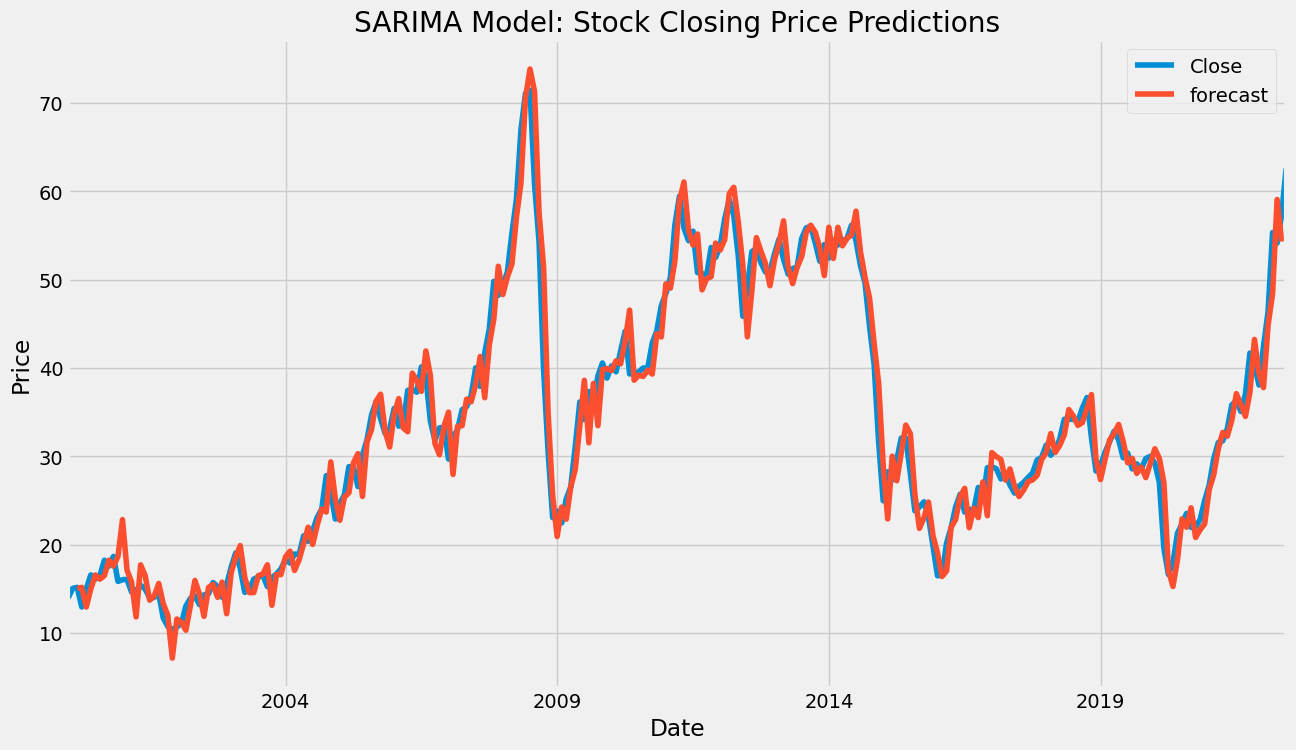

In [ ]:
start_date = '2000-03-31'
end_date = '2022-05-31'
predictions = results.predict(start=start_date, end=end_date, dynamic=False)
monthly_data['forecast']=results.predict(start=start_date,end=end_date,dynamic=False)
monthly_data[['Close','forecast']].plot(figsize=(14,8))
plt.title('SARIMA Model: Stock Closing Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
print("Predictions:")
print(predictions)

# **Future Model Stock Closing Price Predictions and forecasting using dateoffset**

Predictions:
2000-03-31    15.076258
2000-04-30    15.185288
2000-05-31    12.965820
2000-06-30    15.014578
2000-07-31    16.593387
                ...    
2024-01-31    68.068590
2024-02-29    68.972201
2024-03-31    70.141497
2024-04-30    70.689138
2024-05-31    71.341903
Freq: M, Name: predicted_mean, Length: 291, dtype: float64


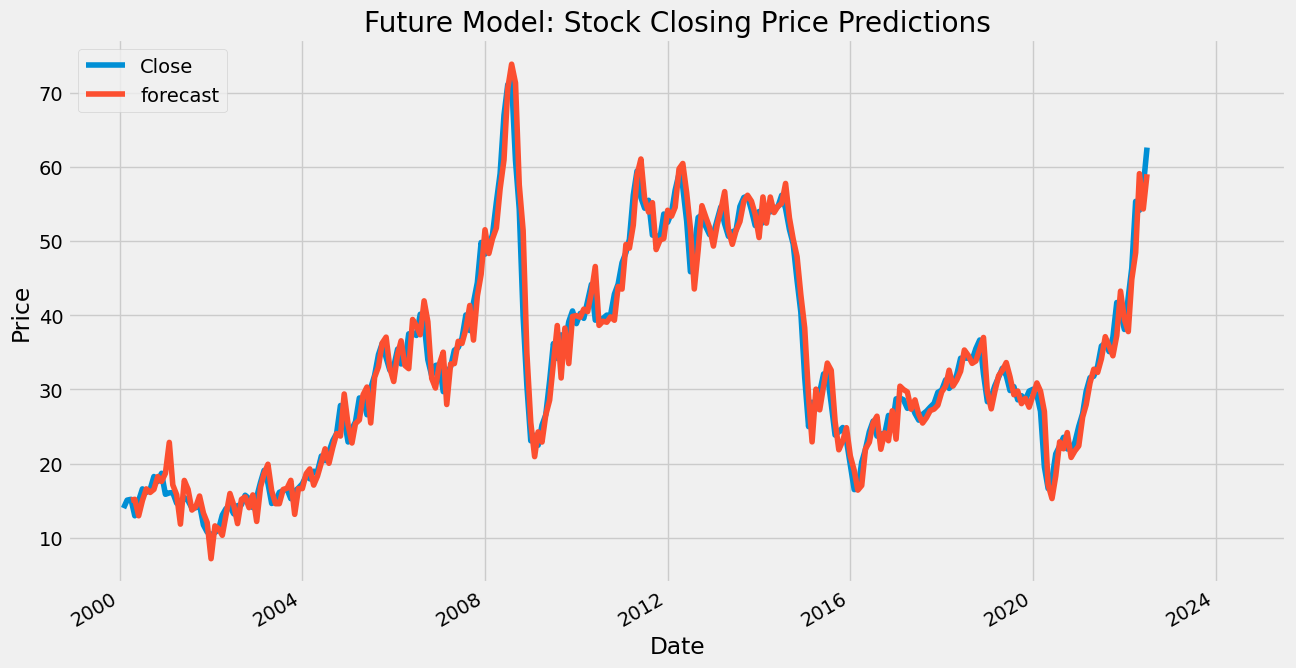

In [ ]:
future_dates=[monthly_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_monthly_data=pd.DataFrame(index=future_dates[1:],columns=monthly_data.columns)
future_datest_monthly_data.tail()
future_df=pd.concat([monthly_data,future_datest_monthly_data])
start_date = '2000-03-31'
end_date = '2024-05-31'
future_df['forecast'] = results.predict(start =start_date, end = end_date, dynamic= False)
predictions = results.predict(start=start_date, end=end_date, dynamic=False)
future_df[['Close', 'forecast']].plot(figsize=(14, 8))
plt.title('Future Model: Stock Closing Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
print("Predictions:")
print(predictions)

# **FROM ABOVE FUTURE MODEL WE CAN SEE THAT THE CLOSING PRICE OF THE MAJOR WORLD OILS IS INCREASING**

# **LSTM Model:**

### Create a new dataframe with only the 'Close' column

In [ ]:
data = monthly_data.filter(['Close'])

### Convert the dataframe to a numpy array

In [ ]:
dataset = data.values

### Get the number of rows to train the model on

In [ ]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

257

## **Using MinMaxScaler we are shrinking the data**

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(monthly_data)
scaled_data

array([[0.05861201],
       [0.07625958],
       [0.07804661],
       [0.04167349],
       [0.075249  ],
       [0.101123  ],
       [0.09328192],
       [0.10005927],
       [0.12840668],
       [0.11751265],
       [0.13554385],
       [0.08913588],
       [0.09233964],
       [0.09281401],
       [0.06947584],
       [0.07249393],
       [0.08193066],
       [0.07499889],
       [0.05898065],
       [0.05952664],
       [0.06653003],
       [0.02149489],
       [0.00564836],
       [0.        ],
       [0.00465595],
       [0.01098795],
       [0.04329483],
       [0.05773751],
       [0.06214003],
       [0.04604902],
       [0.06406517],
       [0.06608059],
       [0.08706968],
       [0.07946271],
       [0.05979503],
       [0.08305967],
       [0.11572945],
       [0.14192213],
       [0.1136013 ],
       [0.06891652],
       [0.07368828],
       [0.09342912],
       [0.09727749],
       [0.10053084],
       [0.07943702],
       [0.09602104],
       [0.10298683],
       [0.112

##**Create scaled training dataset and split into x_train and y_train**

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.05861201, 0.07625958, 0.07804661, 0.04167349, 0.075249  ,
       0.101123  , 0.09328192, 0.10005927, 0.12840668, 0.11751265,
       0.13554385, 0.08913588, 0.09233964, 0.09281401, 0.06947584,
       0.07249393, 0.08193066, 0.07499889, 0.05898065, 0.05952664,
       0.06653003, 0.02149489, 0.00564836, 0.        , 0.00465595,
       0.01098795, 0.04329483, 0.05773751, 0.06214003, 0.04604902,
       0.06406517, 0.06608059, 0.08706968, 0.07946271, 0.05979503,
       0.08305967, 0.11572945, 0.14192213, 0.1136013 , 0.06891652,
       0.07368828, 0.09342912, 0.09727749, 0.10053084, 0.07943702,
       0.09602104, 0.10298683, 0.11241395, 0.13007783, 0.12327934,
       0.13999348, 0.13896925, 0.17368098, 0.16354941, 0.18314555,
       0.20793329, 0.22321287, 0.28532033, 0.25490491, 0.20473426])]
[0.23415455944197586]

[array([0.05861201, 0.07625958, 0.07804661, 0.04167349, 0.075249  ,
       0.101123  , 0.09328192, 0.10005927, 0.12840668, 0.11751265,
       0.13554385, 0.08913588, 0.09

Build , Compile and train the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

210/210 [==============================] - 16s 60ms/step - loss: 0.0232


## **Create testing dataset and get the models predicted to price values and get RMSE**

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 2s 2s/step


8.61534325491683

## **Visualizing**

<ipython-input-175-eb2ebcdb415a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



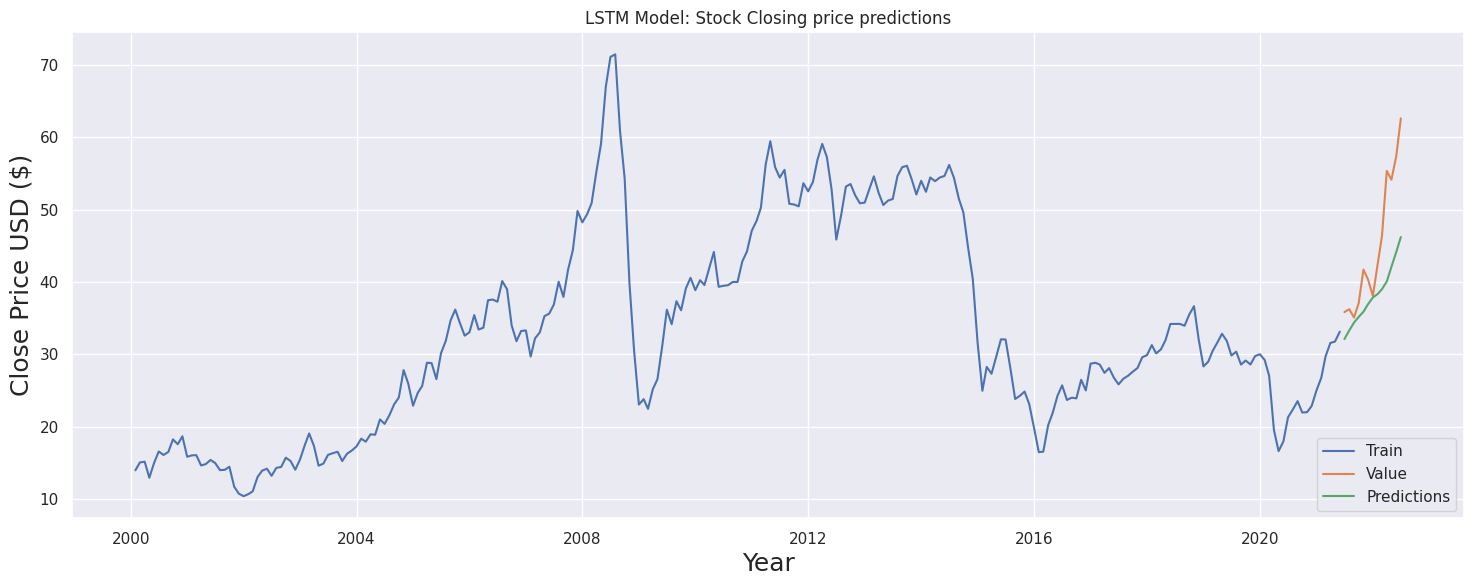

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('LSTM Model: Stock Closing price predictions')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Value', 'Predictions'], loc='lower right')
plt.show()

## **Close price and its predictions**

In [ ]:
valid

Close  Predictions
Date                              
2021-06-30  35.840822    32.122204
2021-07-31  36.243615    33.301201
2021-08-31  35.096083    34.394791
2021-09-30  37.046452    35.170212
2021-10-31  41.712408    35.885178
2021-11-30  40.328333    36.945316
2021-12-31  38.079645    37.858074
2022-01-31  42.467728    38.339104
2022-02-28  46.362795    39.011250
2022-03-31  55.344295    40.067886
2022-04-30  54.140568    42.093803
2022-05-31  57.345114    44.122795
2022-06-30  62.596537    46.208992

# **FROM ABOVE LSTM MODEL WE CAN SEE THAT THE VALUE OF THE CLOSE STOCK PRICE IS INCREASING OVER TIME**